**Loan Approval Prediction Using Machine Learning**

In this Notebook, we are going to solve the Loan Approval Prediction. This is a classification problem in which we need to classify whether the loan will be approved or not. Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. A few examples of classification problems are Spam Email detection, Cancer detection, Sentiment Analysis, etc.

**Understanding the Problem Statement**

A loan is a bank's main source of revenue. The profits earned through loans account for most of the bank's profits. Even though the bank accepts the loan following a lengthy verification and testimony process, there is no guarantee that the chosen candidate is the right one. When done manually, this operation takes a long time. We can predict whether a given hopeful is safe or not, and the entire testimonial process is automated using machine literacy. Loan Prognostic is beneficial to both bank retainers and hopefuls.

The Bank wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

**Loan status** can have two values: Yes or No.

Yes: if the loan is approved No: if the loan is not approved So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

In [124]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df=pd.read_csv('/content/train.csv')

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [126]:
df.shape

(614, 13)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [128]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
df.Gender.fillna(df['Gender'].mode(),inplace=True)
df.Married.fillna(df['Married'].mode(),inplace=True)
df.Dependents.fillna(df['Dependents'].mode(),inplace=True)
df.Self_Employed.fillna(df['Self_Employed'].mode(),inplace=True)
df.LoanAmount.fillna(df['LoanAmount'].mean(),inplace=True)
df.Loan_Amount_Term.fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df.Credit_History.fillna(df['Credit_History'].mean(),inplace=True)

In [130]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [131]:
df.dropna(subset=['Gender','Married','Dependents','Self_Employed'],inplace=True)

In [132]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [133]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5267.059567,1585.575668,144.969009,341.956679,0.843348
std,5455.163295,2524.484889,81.078416,64.727653,0.349310
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3839.500000,1149.000000,128.000000,360.000000,1.000000
75%,5818.750000,2297.250000,166.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [134]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [135]:
!pip install seaborn==0.11

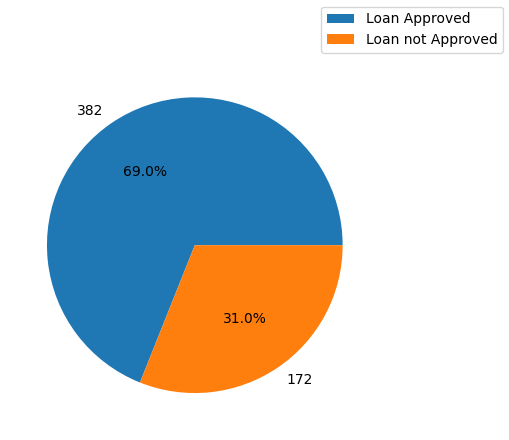

In [136]:
status_count = df['Loan_Status'].value_counts()
plt.pie(status_count,labels=status_count,autopct='%1.1f%%')
plt.figlegend(['Loan Approved','Loan not Approved']);


<Axes: ylabel='LoanAmount'>

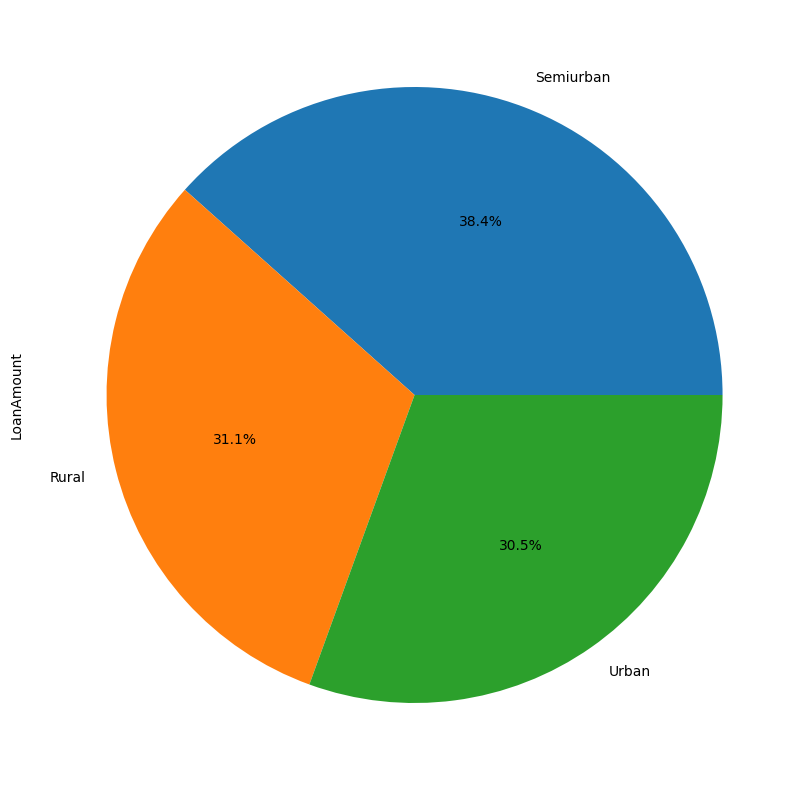

In [137]:
df.groupby('Property_Area')['LoanAmount'].sum().nlargest(10).plot(kind='pie',figsize=(20,10),autopct='%1.1f%%')

<Axes: ylabel='Loan_Status'>

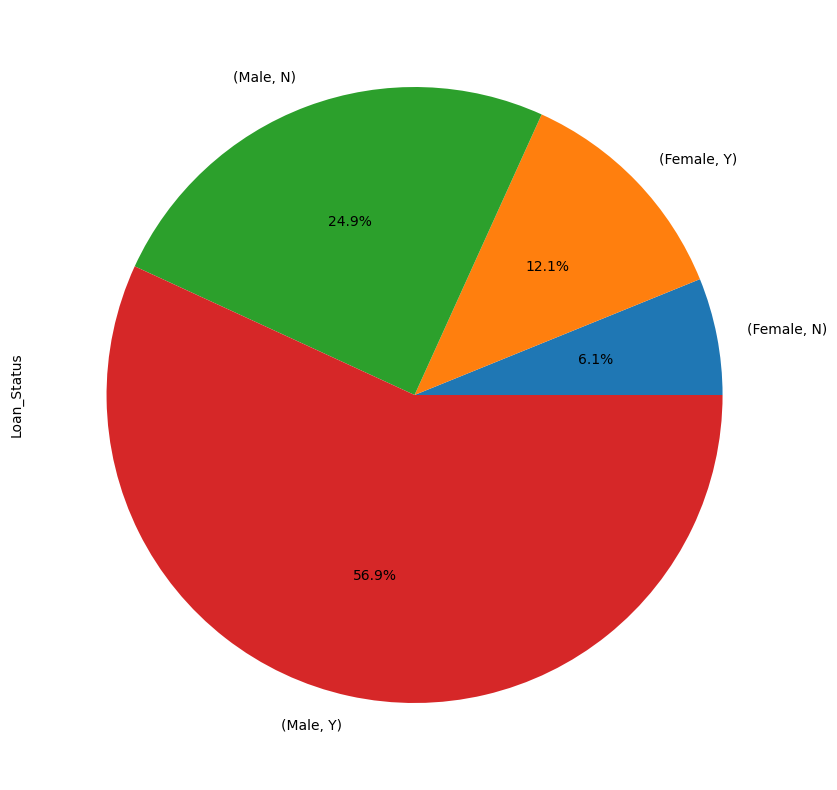

In [138]:
df.groupby('Gender')['Loan_Status'].value_counts().sort_values().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%')

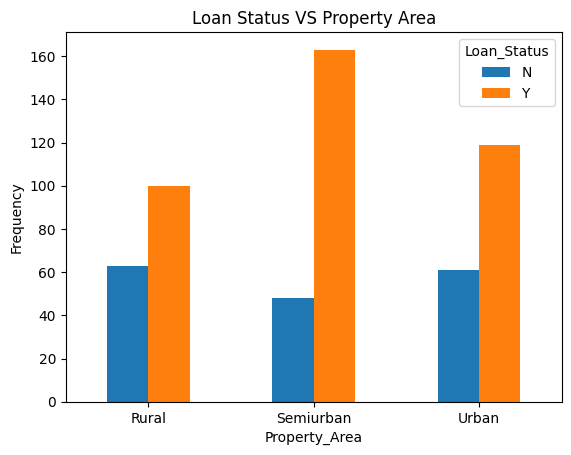

In [139]:
pd.crosstab(df['Property_Area'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Property Area')
plt.xticks(rotation=0);

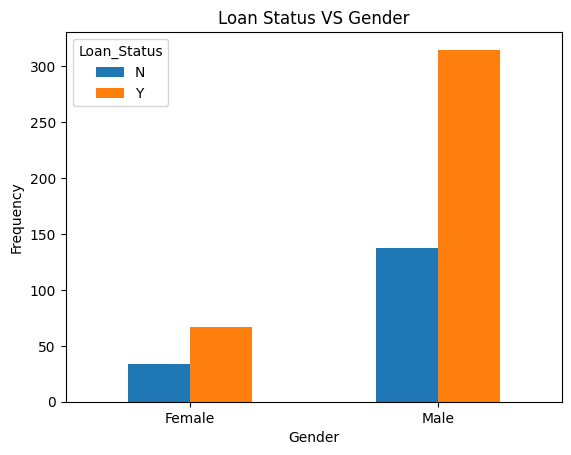

In [140]:
pd.crosstab(df['Gender'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Gender')
plt.xticks(rotation=0);

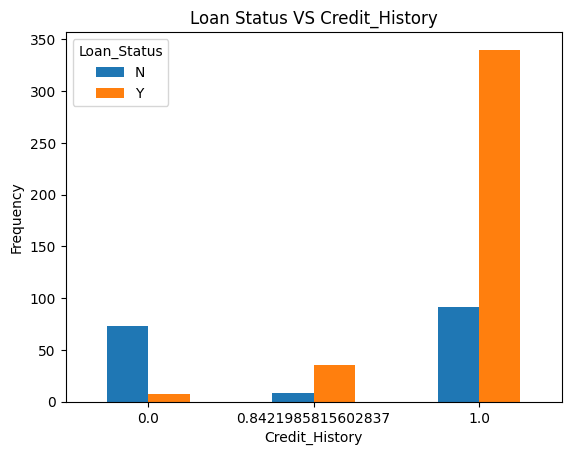

In [141]:
pd.crosstab(df['Credit_History'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Credit_History')
plt.xticks(rotation=0);

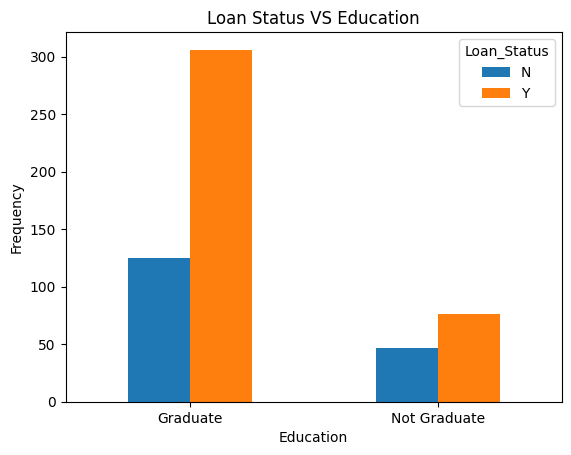

In [142]:
pd.crosstab(df['Education'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Education')
plt.xticks(rotation=0);

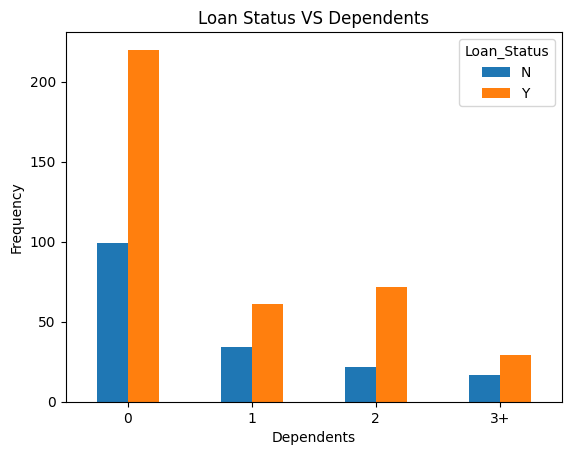

In [143]:
pd.crosstab(df['Dependents'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Dependents')
plt.xticks(rotation=0);

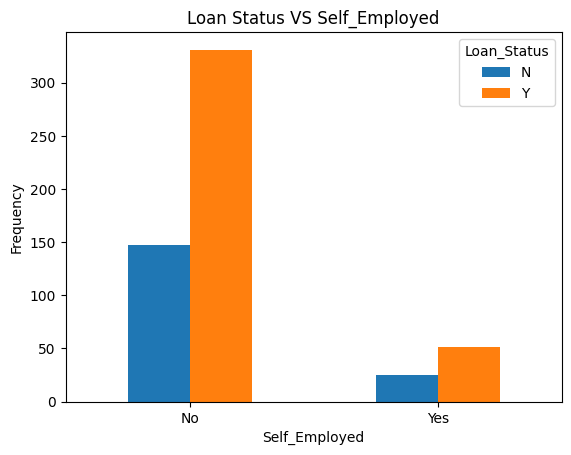

In [144]:
pd.crosstab(df['Self_Employed'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS Self_Employed')
plt.xticks(rotation=0);

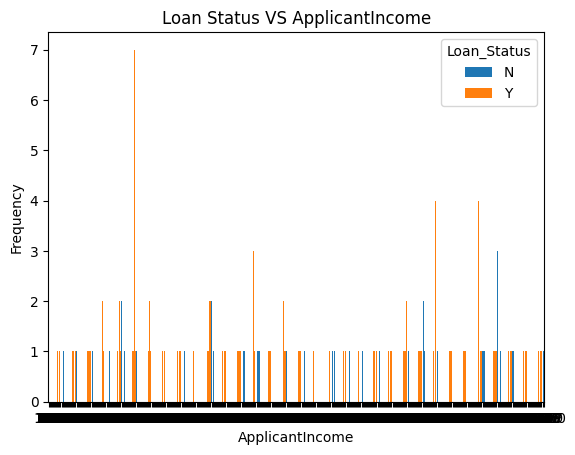

In [145]:
pd.crosstab(df['ApplicantIncome'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS ApplicantIncome')
plt.xticks(rotation=0);

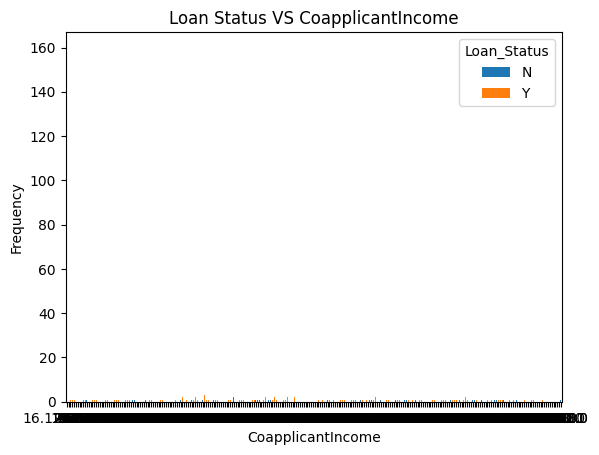

In [146]:
pd.crosstab(df['CoapplicantIncome'],df['Loan_Status']).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Loan Status VS CoapplicantIncome')
plt.xticks(rotation=0);

No     478
Yes     76
Name: Self_Employed, dtype: int64


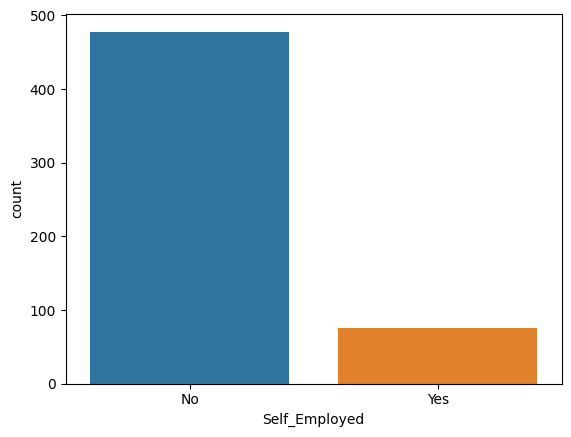

In [147]:
sns.countplot(x='Self_Employed', data=df)
print(df['Self_Employed'].value_counts())

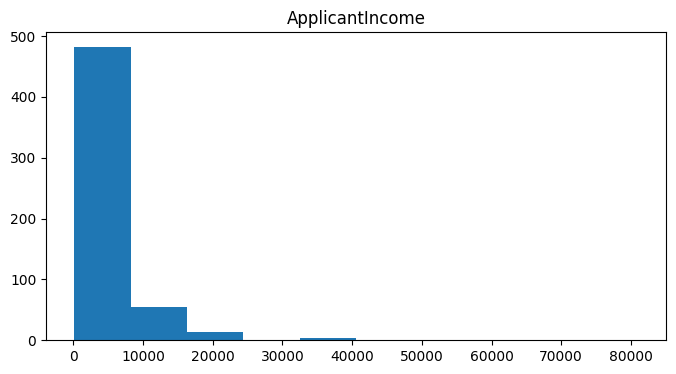

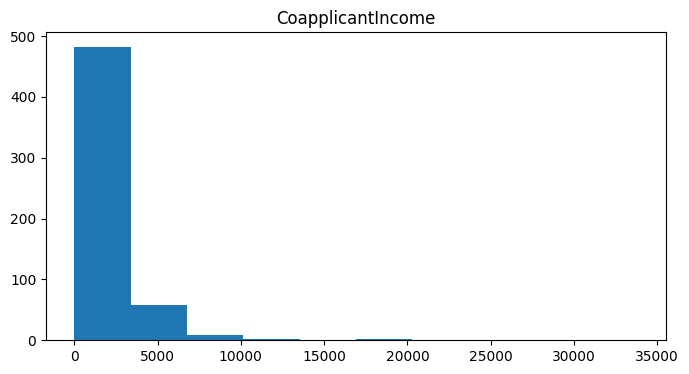

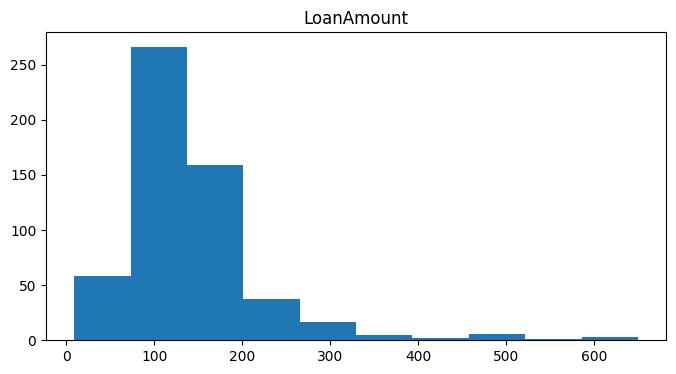

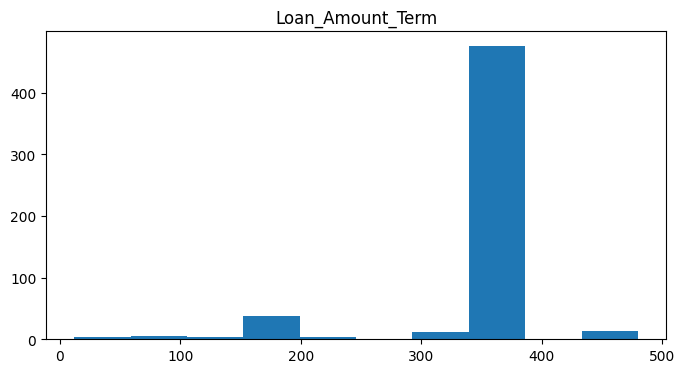

In [148]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

# Feature Engineering

In [149]:
#Converting the scale of loan term from months to years
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In [150]:
#Adding the applicant and co-applicant income to get the total income per application
df['total_income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [151]:
#Dropping the columns as we created a new column which captures the same information
df.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

In [152]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,146.412162,30.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,30.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,30.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,30.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,30.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.000000,30.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.000000,15.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.000000,30.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.000000,30.0,1.0,Urban,Y,7583.0


<ipython-input-153-dce7d0446e5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


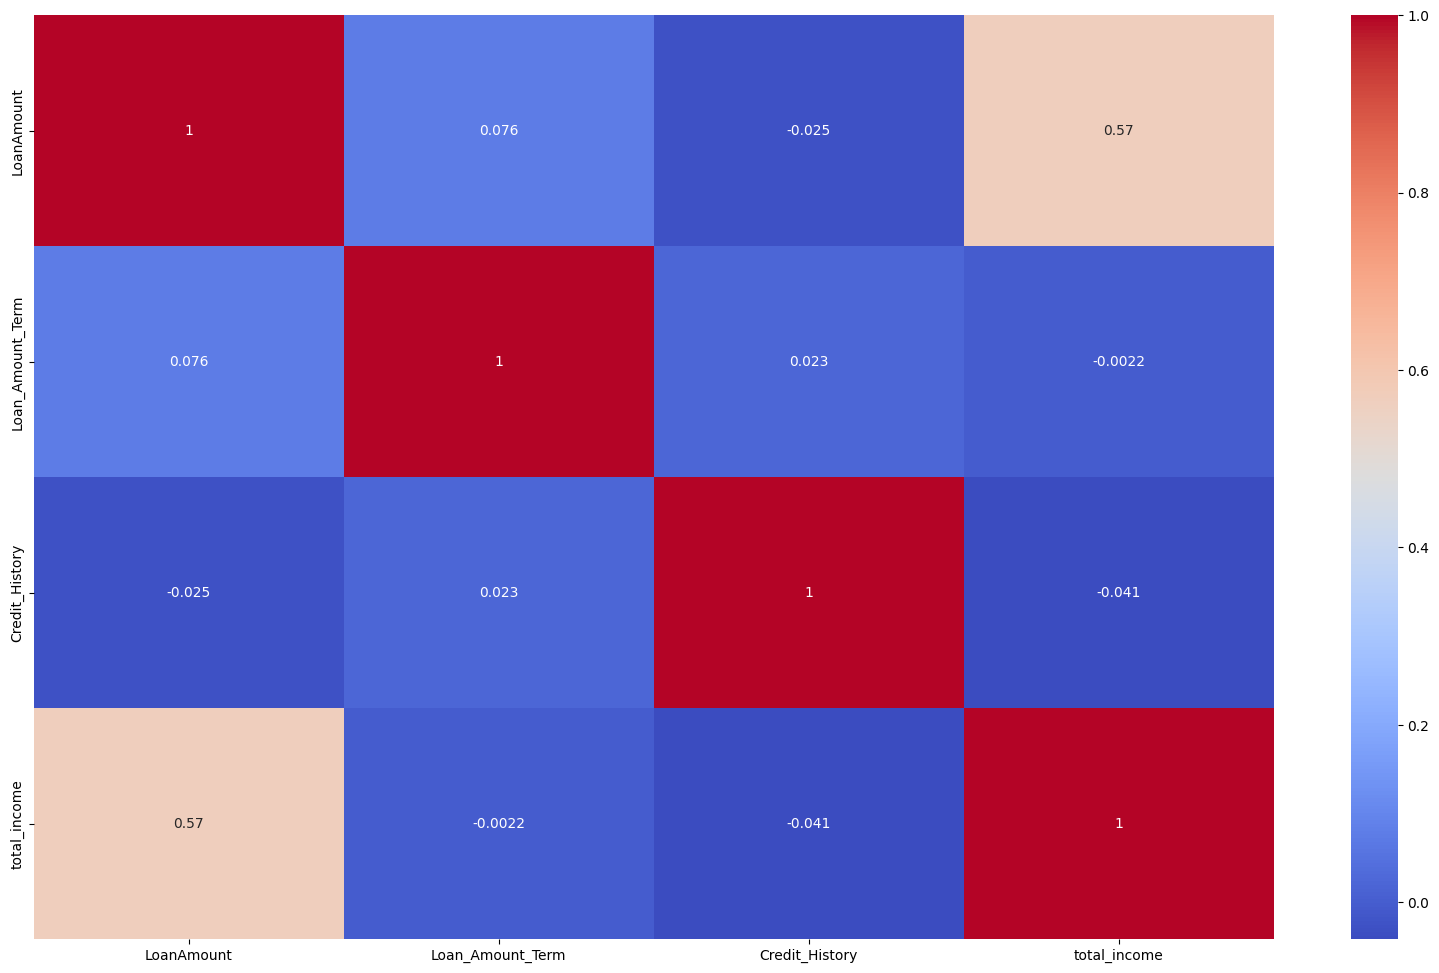

In [153]:
cor=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           554 non-null    object 
 1   Gender            554 non-null    object 
 2   Married           554 non-null    object 
 3   Dependents        554 non-null    object 
 4   Education         554 non-null    object 
 5   Self_Employed     554 non-null    object 
 6   LoanAmount        554 non-null    float64
 7   Loan_Amount_Term  554 non-null    float64
 8   Credit_History    554 non-null    float64
 9   Property_Area     554 non-null    object 
 10  Loan_Status       554 non-null    object 
 11  total_income      554 non-null    float64
dtypes: float64(4), object(8)
memory usage: 56.3+ KB


In [156]:
df.Married.value_counts()

Yes    362
No     192
Name: Married, dtype: int64

In [157]:
df.Gender.value_counts()

Male      453
Female    101
Name: Gender, dtype: int64

In [158]:
df.Dependents.value_counts()

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64

In [159]:
df.Education.value_counts()

Graduate        431
Not Graduate    123
Name: Education, dtype: int64

In [160]:
df.Self_Employed.value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

In [161]:
df.Property_Area.value_counts()

Semiurban    211
Urban        180
Rural        163
Name: Property_Area, dtype: int64

In [162]:
df.Loan_Status.value_counts()

Y    382
N    172
Name: Loan_Status, dtype: int64

# Ordinal Encode

In [163]:

df['Married'] = df['Married'].map({'No':0,'Yes':1})
#df['Dependents'] = df['Dependents'].map({'No':0,'Yes':1})
#df['Gender'] = df['Gender'].map({'No':0,'Yes':1})
df['Education'] = df['Education'].map({'Not Graduate':0,'Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Loan_Status'] = df['Loan_Status'].map({'N':0,'Y':1})
#df['Property_Area'] = df['Property_Area'].map({'N':0,'Y':1})
#df = pd.get_dummies(df, columns = ['Property_Area'])


# Onehot Encode

In [164]:
df = pd.get_dummies(df, columns = ['Property_Area'])

In [165]:
df['Dependents'] = df['Dependents'].replace(['3+'],['3'])
df['Dependents'] = df['Dependents'].astype('int64')
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])

In [166]:
df.drop(columns=['Loan_ID'],axis=1)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,146.412162,30.0,1.0,1,5849.0,0,0,1
1,1,1,1,1,0,128.000000,30.0,1.0,0,6091.0,1,0,0
2,1,1,0,1,1,66.000000,30.0,1.0,1,3000.0,0,0,1
3,1,1,0,0,0,120.000000,30.0,1.0,1,4941.0,0,0,1
4,1,0,0,1,0,141.000000,30.0,1.0,1,6000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.000000,30.0,1.0,1,2900.0,1,0,0
610,1,1,3,1,0,40.000000,15.0,1.0,1,4106.0,1,0,0
611,1,1,1,1,0,253.000000,30.0,1.0,1,8312.0,0,0,1
612,1,1,2,1,0,187.000000,30.0,1.0,1,7583.0,0,0,1


In [167]:
df.drop(columns=['Loan_ID'],inplace=True)

In [168]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,total_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,146.412162,30.0,1.0,1,5849.0,0,0,1
1,1,1,1,1,0,128.000000,30.0,1.0,0,6091.0,1,0,0
2,1,1,0,1,1,66.000000,30.0,1.0,1,3000.0,0,0,1
3,1,1,0,0,0,120.000000,30.0,1.0,1,4941.0,0,0,1
4,1,0,0,1,0,141.000000,30.0,1.0,1,6000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,71.000000,30.0,1.0,1,2900.0,1,0,0
610,1,1,3,1,0,40.000000,15.0,1.0,1,4106.0,1,0,0
611,1,1,1,1,0,253.000000,30.0,1.0,1,8312.0,0,0,1
612,1,1,2,1,0,187.000000,30.0,1.0,1,7583.0,0,0,1


In [169]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

# Split The Data

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=111) # split the data

# Logistic regression

In [172]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_train, y_train) #training of data happens

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
log_reg.predict_proba(X_test)


array([[0.13716636, 0.86283364],
       [0.25326487, 0.74673513],
       [0.25108972, 0.74891028],
       [0.11809701, 0.88190299],
       [0.10291893, 0.89708107],
       [0.20406343, 0.79593657],
       [0.9040973 , 0.0959027 ],
       [0.87403488, 0.12596512],
       [0.30001525, 0.69998475],
       [0.17921446, 0.82078554],
       [0.18351111, 0.81648889],
       [0.16748668, 0.83251332],
       [0.33027298, 0.66972702],
       [0.20549251, 0.79450749],
       [0.10612177, 0.89387823],
       [0.26125803, 0.73874197],
       [0.74895037, 0.25104963],
       [0.17906238, 0.82093762],
       [0.24337866, 0.75662134],
       [0.21568043, 0.78431957],
       [0.10119441, 0.89880559],
       [0.25931346, 0.74068654],
       [0.71621092, 0.28378908],
       [0.1489398 , 0.8510602 ],
       [0.25745112, 0.74254888],
       [0.97881899, 0.02118101],
       [0.1681074 , 0.8318926 ],
       [0.0619226 , 0.9380774 ],
       [0.24906288, 0.75093712],
       [0.16729157, 0.83270843],
       [0.

In [174]:
ypred=log_reg.predict(X_test)
ypred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [175]:
from sklearn.metrics import accuracy_score
accuracy_test_set = log_reg.score(X_test, y_test)
accuracy_test_set

0.7783505154639175

# Decision Tree Classifier

# Choosing the best of depth Value

In [176]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

max_depth = np.arange(1, 20)
cross_val_dt = []

for d in max_depth:
    dt_Classifier = DecisionTreeClassifier(max_depth=d, random_state=0)
    dt_Classifier.fit(X_train, y_train)
    train_score = dt_Classifier.score(X_train, y_train)
    cross_val_mean = cross_val_score(dt_Classifier, X_train, y_train, cv=10).mean()
    print("Depth:", d, "Train Score:", train_score, "Cross-Validation Score:", cross_val_mean)
    cross_val_dt.append(cross_val_mean)

Depth: 1 Train Score: 0.825 Cross-Validation Score: 0.825
Depth: 2 Train Score: 0.8361111111111111 Cross-Validation Score: 0.8277777777777778
Depth: 3 Train Score: 0.8388888888888889 Cross-Validation Score: 0.8277777777777778
Depth: 4 Train Score: 0.8444444444444444 Cross-Validation Score: 0.8027777777777778
Depth: 5 Train Score: 0.8638888888888889 Cross-Validation Score: 0.7777777777777778
Depth: 6 Train Score: 0.8638888888888889 Cross-Validation Score: 0.7972222222222223
Depth: 7 Train Score: 0.875 Cross-Validation Score: 0.7888888888888889
Depth: 8 Train Score: 0.8888888888888888 Cross-Validation Score: 0.7861111111111112
Depth: 9 Train Score: 0.9027777777777778 Cross-Validation Score: 0.7611111111111112
Depth: 10 Train Score: 0.9277777777777778 Cross-Validation Score: 0.7611111111111111
Depth: 11 Train Score: 0.9361111111111111 Cross-Validation Score: 0.7583333333333334
Depth: 12 Train Score: 0.95 Cross-Validation Score: 0.7555555555555555
Depth: 13 Train Score: 0.9555555555555556 

In [177]:
cross_val_dt_Classifier=max(cross_val_dt)
cross_val_dt_Classifier

0.8277777777777778

In [196]:
print("The best depth is 3 and Cross_val_score is:",cross_val_dt_Classifier)

The best depth is 3 and Cross_val_score is: 0.8277777777777778


# Implementing Decision Tree Classifier

In [197]:

dt_Classifier=DecisionTreeClassifier(max_depth=3, random_state=42)
dt_Classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [198]:
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)


0.8388888888888889
0.788659793814433


# Importance Feature

In [219]:
ftImp = list(zip(dtc.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
7,0.837136,Credit_History
8,0.127906,Loan_Status
10,0.034958,Property_Area_Rural
0,0.000000,Gender
1,0.000000,Married
2,0.000000,Dependents
3,0.000000,Education
4,0.000000,Self_Employed
5,0.000000,LoanAmount
6,0.000000,Loan_Amount_Term


# Random Forest Classifier


# Choosing the best depth value

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_Classifier=RandomForestClassifier(max_depth=d, random_state=0)
  rf_Classifier.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.8194444444444444
Depth :  4 cross_val_score :  0.825
Depth :  8 cross_val_score :  0.8138888888888889
Depth :  10 cross_val_score :  0.8000000000000002
Depth :  12 cross_val_score :  0.7916666666666667
Depth :  14 cross_val_score :  0.7972222222222223
Depth :  16 cross_val_score :  0.7861111111111112
Depth :  18 cross_val_score :  0.7861111111111112


In [182]:
# Find the maximum cross-validation score and its corresponding depth
max_cross_val_score = max(cross_val_rf)
best_depth = max_depth[cross_val_rf.index(max_cross_val_score)]

print("Best Depth:", best_depth)
print("Max Cross-Validation Score:", max_cross_val_score)

Best Depth: 4
Max Cross-Validation Score: 0.825


# Implementing Random Forest Classifier

In [183]:
rf_regressor=RandomForestClassifier(max_depth=4, random_state=42)
rf_regressor.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [184]:
rfc = RandomForestClassifier( max_depth =4,random_state = 42)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))


0.8361111111111111
0.7680412371134021


# Extreme Gradient Boosting Classifier

# Choosing the best Learning Rate

In [185]:

import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.2277218163073597
Learning rate :  0.05 cross_val_score: 0.1637286115325753
Learning rate :  0.08 cross_val_score: 0.07322507752343471
Learning rate :  0.1 cross_val_score: 0.03948018231936193
Learning rate :  0.2 cross_val_score: -0.03854680116729459
Learning rate :  0.25 cross_val_score: -0.05344345375695339
Learning rate :  0.3 cross_val_score: -0.08672120613278306


In [186]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.2277218163073597

In [187]:
print("The best Learning rate is 0.01 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.01 and Cross_val_score is: 0.2277218163073597


# Implementing Extreme Gradient Boosting Classifier

In [188]:
 xgb_regressor= xgb.XGBRegressor(learning_rate =0.01,n_estimators=100) # initialise the model
 xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [189]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01,random_state = 42)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8388888888888889
0.7783505154639175


# K Nearest Neighbor Classifier

# Choosing the best K(neighbor) Value

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_Classifier=KNeighborsClassifier(n_neighbors=k)
  knn_Classifier.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_Classifier.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_Classifier,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_Classifier,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.7333333333333334
K value :  2  train score :  0.8722222222222222 cross_val_score :  0.6416666666666666
K value :  3  train score :  0.85 cross_val_score :  0.7694444444444445
K value :  4  train score :  0.8444444444444444 cross_val_score :  0.7416666666666668
K value :  5  train score :  0.8333333333333334 cross_val_score :  0.8055555555555556
K value :  6  train score :  0.8388888888888889 cross_val_score :  0.775
K value :  7  train score :  0.8194444444444444 cross_val_score :  0.7944444444444445
K value :  8  train score :  0.8138888888888889 cross_val_score :  0.7861111111111112
K value :  9  train score :  0.8055555555555556 cross_val_score :  0.7972222222222223
K value :  10  train score :  0.8083333333333333 cross_val_score :  0.7972222222222223
K value :  11  train score :  0.8111111111111111 cross_val_score :  0.7777777777777778
K value :  12  train score :  0.8138888888888889 cross_val_score :  0.7833333333333334
K value

In [221]:
cross_val_knn_Classifier=max(cross_val_knn)
cross_val_knn_Classifier

0.8055555555555556

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

In [224]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(knn.score(X_test, y_test))

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1]
0.5979381443298969


In [225]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[ 27,  39],
       [  4, 124]])

In [226]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.87      0.41      0.56        66
           1       0.76      0.97      0.85       128

    accuracy                           0.78       194
   macro avg       0.82      0.69      0.70       194
weighted avg       0.80      0.78      0.75       194



# Confusion Matrix

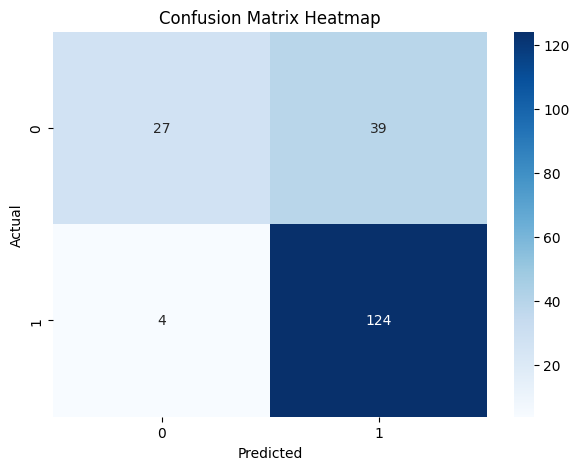

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a confusion matrix stored in 'cm'
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [228]:
#check accuracy score.
accuracy_score(y_test, ypred)

0.7783505154639175

In [229]:
from sklearn.metrics import f1_score
f1_score(y_test,ypred, average = 'macro')

0.70446735395189

ROC AUC Score: 0.6889204545454546


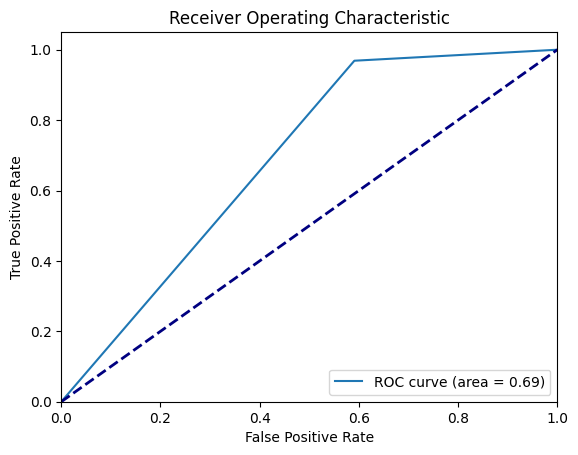

In [230]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already trained a logistic regression model (log_reg) and X_test, y_test data is available


# Make predictions on the test data
#y_test_predictions = log_reg.predict_proba(X_test)[:, 1]  # Use predicted probabilities for the positive class
y_test_predictions =log_reg.predict(X_test)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_predictions)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_test_predictions)

# Print the AUC score
print("ROC AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Conclusion**

The accuracy of the prediction through the constructed model on the testing data is found to be 69%.

The observation inferred through this analysis is that the variable Credit History affects the chance of approval of the loan by a huge difference.
The applicants with the Property Area as Sub-urban has more credibility among the applicants for loan.
Those applicants who are married are more likely to get their loan approved.